# hnRNAP2

In [2]:
import os
import sys
import re
import importlib
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import numpy as np
import matplotlib.pyplot as plt
import glob

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);

### Dignon's

Main objective of this notebook is to reproduce Dignon's results for this protein, from the paper : https://www.ncbi.nlm.nih.gov/pubmed/30217894 (figure 2A and 2B). For this we set up the hnRNPA with replica exchange between 150K and 600K with varying replica swapping frequency. The files were generated using my scripts, so they are **not** provided by Gregory Dignon himself. First although we load all possible results for easier comparison later!

In [1]:
runs = {}
# Dignon's Flory results:
f = '/home/adria/data/exp/dignon_data/flory.txt'
d_florys = np.genfromtxt(f, delimiter=',')
runs["dignon"]["florys"] = d_florys


NameError: name 'np' is not defined

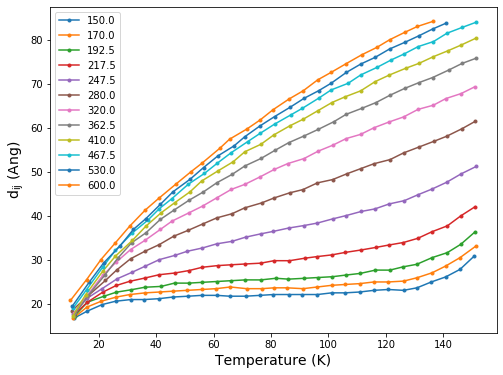

In [81]:
# Dignon's R_ij results
dij_dir = '/home/adria/data/exp/dignon_data/rijs'
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]

data = glob.glob(os.path.join(dij_dir, '*'))
data = sorted(data, key=lambda x: int(re.findall(r'\d+', os.path.basename(x))[0]))

plt.figure(figsize=(8,6))
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('$\mathregular{d_{ij}}$ (Ang)', fontsize=14)
for i, d in enumerate(data):
    dat = np.genfromtxt(d, delimiter=',')
    plt.plot(dat[:, 0], dat[:, 1]*10, '.-', label=Ts[i])
plt.legend();

### Mine

**FAST REPLICA** (swap every 20ps)

I set up 4 different replica exchange simulations keeping the available parameters for Dignon. Each of them differs in the frequency of swapping between replica's and one differs from the other in the Langevin damping rate (how fast we force the temperature of the system to be the desired one).

The fastest swapping replica (attempting exchange every 20 ps) results in the following :

In [82]:
fast_dir = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/3RE-T-hnRPA'
fast = analysis.Analysis(oliba_wd=fast_dir, temper=True)
r0 = 5.5
florys = fast.flory_scaling_fit(r0=r0, use='md')

======================================== Starting flory exponent calculation for R0 5.5 using md ========================================
======================================== Calculating ij from contact map using md ========================================
======================================== Calculating contact map using md ========================================
Omitting temper reordering (reorder files already present)
======================================== CONTACT MAP CALCULATION FINISHED ========================================
======================================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ========================================
======================================== FLORY EXPONENT CALCULATION FINISHED ========================================


Text(0, 0.5, 'ν')

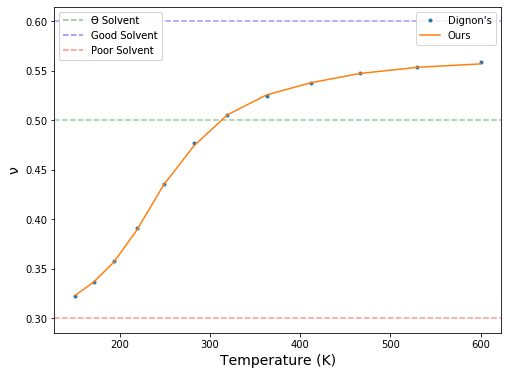

In [83]:
f = '/home/adria/data/exp/dignon_data/flory.txt'
d_florys = np.genfromtxt(f, delimiter=',')
ax = plt.figure(figsize=(8,6))
ah1 = plt.axhline(0.5, ls='--', label='\u03F4 Solvent', alpha=.4, color='green')
ah2 = plt.axhline(0.6, ls='--', label='Good Solvent', alpha=.4, color='blue')
ah3 = plt.axhline(0.3, ls='--', label='Poor Solvent', alpha=.4, color='red')
dign = plt.plot(d_florys[:,0], d_florys[:,1], '.', label='Dignon\'s');
ours = plt.plot(d_florys[:,0], florys[0], label='Ours')

legend1 = plt.legend((dign[0], ours[0]), ('Dignon\'s','Ours'), loc=1)
legend2 = plt.legend((ah1, ah2, ah3), ('\u03F4 Solvent', 'Good Solvent', 'Poor Solvent'), loc=2)

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("ν", fontsize=14)

======================================== Calculating ij from contact map using md ========================================
======================================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ========================================


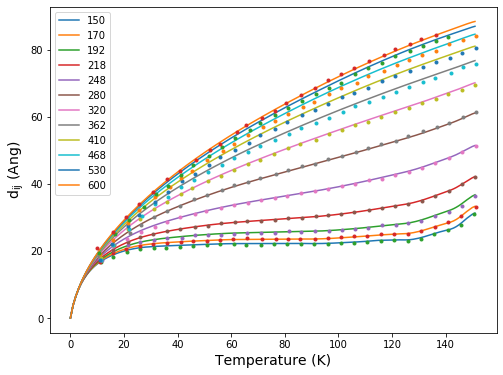

In [84]:
dij_dir = '/home/adria/data/exp/dignon_data/rijs'
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]

ijs, means = fast.ij_from_contacts(use='md')
plt.figure(figsize=(8,6))
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('$\mathregular{d_{ij}}$ (Ang)',fontsize=14)

for i in range(ijs.shape[0]):
    plt.plot(ijs[i, :], means[i,:], label=f'{Ts[i]:.0f}')
    
data = glob.glob(os.path.join(dij_dir, '*'))
data = sorted(data, key=lambda x: int(re.findall(r'\d+', os.path.basename(x))[0]))

for i, d in enumerate(data):
    dat = np.genfromtxt(d, delimiter=',')
    plt.plot(dat[:, 0], dat[:, 1]*10, '.')
plt.legend();

**SLOW REPLICA** (swap every 2000ps)

In [115]:
slow_dir = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/RE-T-hnRPA'
slow = analysis.Analysis(oliba_wd=slow_dir, temper=True)
r0 = 5.5
florys = slow.flory_scaling_fit(r0=r0, use='md')

==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
Swapping progress : 99.79 %
<mdtraj.Trajectory with 9603 frames, 152 atoms, 1 residues, and unitcells>
==================== CONTACT MAP CALCULATION FINISHED ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================
==================== FLORY EXPONENT CALCULATION FINISHED ====================


Text(0, 0.5, 'ν')

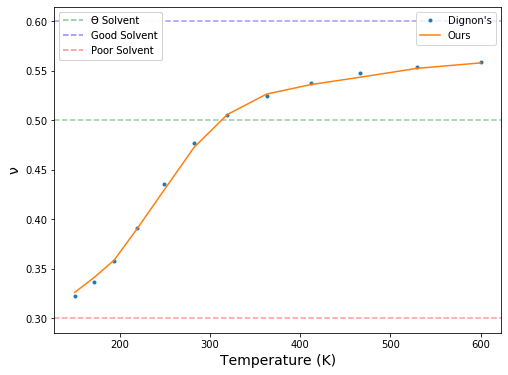

In [116]:
f = '/home/adria/data/exp/dignon_data/flory.txt'
d_florys = np.genfromtxt(f, delimiter=',')
ax = plt.figure(figsize=(8,6))
ah1 = plt.axhline(0.5, ls='--', label='\u03F4 Solvent', alpha=.4, color='green')
ah2 = plt.axhline(0.6, ls='--', label='Good Solvent', alpha=.4, color='blue')
ah3 = plt.axhline(0.3, ls='--', label='Poor Solvent', alpha=.4, color='red')
dign = plt.plot(d_florys[:,0], d_florys[:,1], '.', label='Dignon\'s');
ours = plt.plot(d_florys[:,0], florys[0], label='Ours')

legend1 = plt.legend((dign[0], ours[0]), ('Dignon\'s','Ours'), loc=1)
legend2 = plt.legend((ah1, ah2, ah3), ('\u03F4 Solvent', 'Good Solvent', 'Poor Solvent'), loc=2)

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("ν", fontsize=14)

==================== Calculating ij from contact map using md ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================


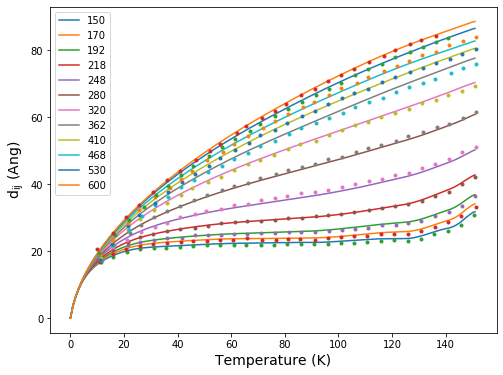

In [118]:
dij_dir = '/home/adria/data/exp/dignon_data/rijs'
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]

ijs, means = slow.ij_from_contacts(use='md')
plt.figure(figsize=(8,6))
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('$\mathregular{d_{ij}}$ (Ang)',fontsize=14)

for i in range(ijs.shape[0]):
    plt.plot(ijs[i, :], means[i,:], label=f'{Ts[i]:.0f}')
    
data = glob.glob(os.path.join(dij_dir, '*'))
data = sorted(data, key=lambda x: int(re.findall(r'\d+', os.path.basename(x))[0]))

for i, d in enumerate(data):
    dat = np.genfromtxt(d, delimiter=',')
    plt.plot(dat[:, 0], dat[:, 1]*10, '.')
plt.legend();

**FAST REPLICA** ***with high viscosity (fast temperature correction)***

In [122]:
lang_dir = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA'
lang = analysis.Analysis(oliba_wd=lang_dir, temper=True)
r0 = 5.5
florys = lang.flory_scaling_fit(r0=r0, use='md')

==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
['/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump6.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump4.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump5.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump2.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump3.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump0.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump7.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump1.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump9.dcd', '/home/adria/perdiux/prod/lammps/dignon/hnRPA/4RE-T-hnRPA/dcd_dump10.dcd', 

Text(0, 0.5, 'ν')

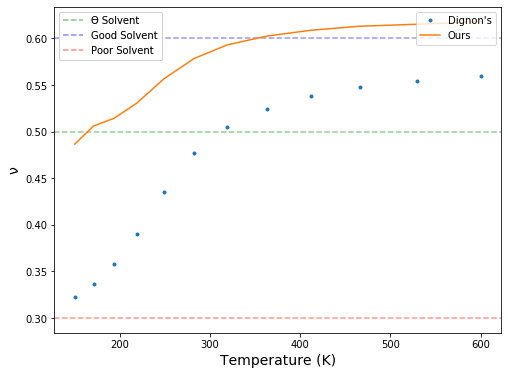

In [123]:
f = '/home/adria/data/exp/dignon_data/flory.txt'
d_florys = np.genfromtxt(f, delimiter=',')
ax = plt.figure(figsize=(8,6))
ah1 = plt.axhline(0.5, ls='--', label='\u03F4 Solvent', alpha=.4, color='green')
ah2 = plt.axhline(0.6, ls='--', label='Good Solvent', alpha=.4, color='blue')
ah3 = plt.axhline(0.3, ls='--', label='Poor Solvent', alpha=.4, color='red')
dign = plt.plot(d_florys[:,0], d_florys[:,1], '.', label='Dignon\'s');
ours = plt.plot(d_florys[:,0], florys[0], label='Ours')

legend1 = plt.legend((dign[0], ours[0]), ('Dignon\'s','Ours'), loc=1)
legend2 = plt.legend((ah1, ah2, ah3), ('\u03F4 Solvent', 'Good Solvent', 'Poor Solvent'), loc=2)

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("ν", fontsize=14)

==================== Calculating ij from contact map using md ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================


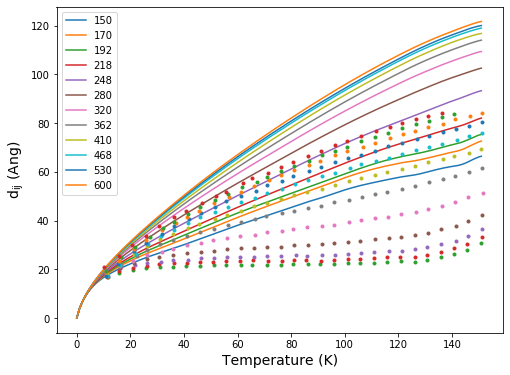

In [124]:
dij_dir = '/home/adria/data/exp/dignon_data/rijs'
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]

ijs, means = lang.ij_from_contacts(use='md')
plt.figure(figsize=(8,6))
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('$\mathregular{d_{ij}}$ (Ang)',fontsize=14)

for i in range(ijs.shape[0]):
    plt.plot(ijs[i, :], means[i,:], label=f'{Ts[i]:.0f}')
    
data = glob.glob(os.path.join(dij_dir, '*'))
data = sorted(data, key=lambda x: int(re.findall(r'\d+', os.path.basename(x))[0]))

for i, d in enumerate(data):
    dat = np.genfromtxt(d, delimiter=',')
    plt.plot(dat[:, 0], dat[:, 1]*10, '.')
plt.legend();

**NON REPLICA**

We also ran the same simulations but without a replica exchange scheme to see how convergence benefits from the replica exchange:

In [125]:
nonr = '/home/adria/perdiux/prod/lammps/dignon/hnRPA/T-hnRPA'
nr = analysis.Analysis(oliba_wd=nonr, temper=False)
r0 = 5.5
florys = nr.flory_scaling_fit(r0=r0, use='md')[0]

==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
==================== CONTACT MAP CALCULATION FINISHED ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================
==================== FLORY EXPONENT CALCULATION FINISHED ====================


In [ ]:
redTs = [150., 170.1, 193., 218.9, 248.3, 281.7, 362.4, 411.1, 529., 600.]

f = '/home/adria/data/exp/dignon_data/flory.txt'
d_florys = np.genfromtxt(f, delimiter=',')
ax = plt.figure(figsize=(8,6))
ah1 = plt.axhline(0.5, ls='--', label='\u03F4 Solvent', alpha=.4, color='green')
ah2 = plt.axhline(0.6, ls='--', label='Good Solvent', alpha=.4, color='blue')
ah3 = plt.axhline(0.3, ls='--', label='Poor Solvent', alpha=.4, color='red')
dign = plt.plot(d_florys[:,0], d_florys[:,1], '.', label='Dignon\'s');
ours = plt.plot(redTs, florys, label='Ours')

legend1 = plt.legend((dign[0], ours[0]), ('Dignon\'s','Ours'), loc=1)
legend2 = plt.legend((ah1, ah2, ah3), ('\u03F4 Solvent', 'Good Solvent', 'Poor Solvent'), loc=2)

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("ν", fontsize=14)

==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
Omitting temper reordering (reorder files already present)


**Non replica vs replica comparison**

In [ ]:
redTs = [150., 170.1, 193., 218.9, 248.3, 281.7, 362.4, 411.1, 529., 600.]

f = '/home/adria/data/exp/dignon_data/flory.txt'
fast_florys = fast.flory_scaling_fit(r0=r0, use='md')
ax = plt.figure(figsize=(8,6))
ah1 = plt.axhline(0.5, ls='--', label='\u03F4 Solvent', alpha=.4, color='green')
ah2 = plt.axhline(0.6, ls='--', label='Good Solvent', alpha=.4, color='blue')
ah3 = plt.axhline(0.3, ls='--', label='Poor Solvent', alpha=.4, color='red')
ours = plt.plot(redTs, florys, label='Ours')
ours2 = plt.plot(Ts, fast_florys, label='Ours')

legend1 = plt.legend((ours2[0], ours[0]), ('Replica', 'Non Replica'), loc=1)
legend2 = plt.legend((ah1, ah2, ah3), ('\u03F4 Solvent', 'Good Solvent', 'Poor Solvent'), loc=2)

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("ν", fontsize=14)

**Slow vs Fast RE**

==================== Calculating ij from contact map using md ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================


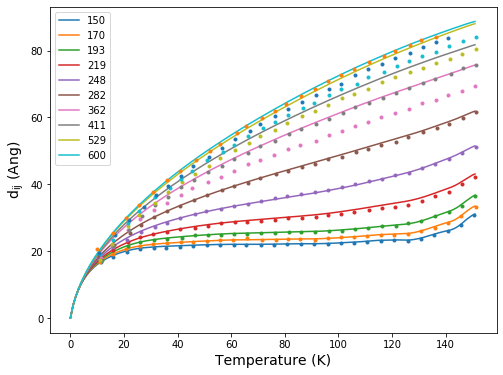

In [107]:
dij_dir = '/home/adria/data/exp/dignon_data/rijs'
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]

ijs, means = nr.ij_from_contacts(use='md')
plt.figure(figsize=(8,6))
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('$\mathregular{d_{ij}}$ (Ang)',fontsize=14)

for i in range(ijs.shape[0]):
    plt.plot(ijs[i, :], means[i,:], label=f'{redTs[i]:.0f}')
    
data = glob.glob(os.path.join(dij_dir, '*'))
data = sorted(data, key=lambda x: int(re.findall(r'\d+', os.path.basename(x))[0]))

for i, d in enumerate(data):
    dat = np.genfromtxt(d, delimiter=',')
    plt.plot(dat[:, 0], dat[:, 1]*10, '.')
plt.legend();